### 1. Импортируем библиотеки

In [357]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

### 2. Загружаем и анализируем исходный массив данных

In [280]:
# загрузка файлов для локального ноутбука
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [158]:
# Загрузка файлов для kaggle
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#PATH_to_file = '/kaggle/input/sf-dst-scoring/'
#df_train = pd.read_csv(PATH_to_file+'train.csv')
#df_test = pd.read_csv(PATH_to_file+'test.csv')

In [159]:
print('Размерность тестовой выборки = {}'.format(df_test.shape))

Размерность тестовой выборки = (36349, 18)


In [160]:
print(df_train.info())
display(df_train.head(3))
print('Размерность выборки для обучения = {}'.format(df_train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0


Размерность выборки для обучения = (73799, 19)


In [161]:
df_test.info()
display(df_test.head(3))
print('Размерность тестовой выборки = {}'.format(df_test.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y


Размерность тестовой выборки = (36349, 18)


In [162]:
df_train.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [163]:
df_test.isna().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [406]:
# Размечаем массив для обучения и массив для тестирования и объединяем 2 выборки для проведения анализа
df_train['Train'] = 1  # помечаем где у нас трейн
df_test['Train'] = 0  # помечаем где у нас тест

df = df_train.append(df_test, sort=False).reset_index(drop=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [166]:
df.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default,Train
count,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,73799.000000,110148.000000
mean,55074.500000,39.249410,0.273205,0.165514,-1.904535,2.005002,56.751189,1.574945,2.497867,41012.648537,1.731588,2.765570,0.126994,0.669999
std,31797.133063,11.518063,0.799099,0.371645,0.499397,2.266926,13.065923,0.527562,0.687651,45399.735051,1.122652,1.010151,0.332968,0.470215
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,0.000000
25%,27537.750000,30.000000,0.000000,0.000000,-2.260434,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000,0.000000
50%,55074.500000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000,1.000000
75%,82611.250000,48.000000,0.000000,0.000000,-1.567888,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000,1.000000
max,110148.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000,1.000000


In [167]:
df.isna().sum()

client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
Train                   0
dtype: int64

Резюме по предварительному анализу: в тренировочной выборке 73799 клиентов, в тестовой - 36349. Всего данные о 110148 клиентах. Всего 20 переменных, из них 1 - временной ряд, 6 бинарных, 7 категориальных и 8 числовых. Всего пропусков 478 (0.43%), все пропуски в переменной education. client_id уникальный числовой признак, который не несет полезностей. В бинарных признаках наше целевая переменная default и искуственно добавленный признак тренировочной части датасета Train

Описания полей датасета

- client_id - идентификатор клиента
- education - уровень образования
- sex - пол заемщика
- age - возраст заемщика
- car - флаг наличия автомобиля
- car_type - флаг автомобиля иномарки
- decline_app_cnt - количество отказанных прошлых заявок
- good_work - флаг наличия “хорошей” работы
- bki_request_cnt - количество запросов в БКИ
- home_address - категоризатор домашнего адреса
- work_address - категоризатор рабочего адреса
- income - доход заемщика
- foreign_passport - наличие загранпаспорта
- sna - связь заемщика с клиентами банка
- first_time - давность наличия информации о заемщике
- score_bki - скоринговый балл по данным из БКИ
- region_rating - рейтинг региона
- app_date - дата подачи заявки
- default - флаг дефолта по кредиту

In [407]:
# внесем данные из резюме в списки
# временной ряд (1)
time_cols = ['app_date']
# бинарные переменные (default не включаем в список) (5+1 = 6)
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
# категориальные переменные (Train не включаем в список, так как мы сами его добавили) (3+1=4)
cat_cols = ['education', 'region_rating',
            'home_address', 'work_address', 'sna', 'first_time']
# числовые переменные, client_id исключили из списка (8)
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
# client_id не включаем в списки

### 3. Проведем анализ каждого из признаков, заполним пропуски (при необходимости)

#### Проанализируем столбец EDUCATION

Обработаем этот столбец в самом начале, так как в нем единственном имеются пропуски. Это признак категорий, поэтому, тобы не возвращаться к нему, сразу сделаем Dummy переменные.

In [168]:
print('Количество пропусков в столбце = {}'.format(df.education.isna().sum()))
print('{}% от общего числа наблюдений являются пропусками'.
      format(round((df.education.isna().sum())/len(df.education)*100, 2)))

Количество пропусков в столбце = 478
0.43% от общего числа наблюдений являются пропусками


Рассмотрим распределение значений в столбце и заполним самым часто встречающимся в случае его однозначного выделения, а также создадим отдельный столбец, который отражает наличие пропуска в бинарном исполнении

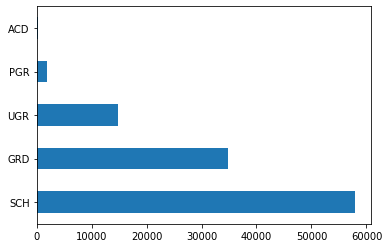

In [169]:
df.education.value_counts().plot.barh()

In [170]:
round(df.education.value_counts(normalize=True), 2)

SCH    0.53
GRD    0.32
UGR    0.13
PGR    0.02
ACD    0.00
Name: education, dtype: float64

In [408]:
df['education_is_NAN'] = pd.isna(df['education']).astype('uint8')

In [409]:
df.education.fillna('SCH', inplace=True)

Поскольку признак является категориальным (5 категорий), сделаем из столбца dummy-переменные и удалим столбец education и одну из dummy(она избыточна)

In [410]:
df_dummies_edu = pd.get_dummies(df.education)
df = pd.merge(df, df_dummies_edu, left_index=True, right_index=True)
df.drop(['education'], axis=1, inplace=True)

In [411]:
df.drop(['UGR'], axis=1, inplace=True)

### Исследование числовых признаков

Проверим числовые признаки на нормальность/логнормальность распределения. В рамках рассмотрения каждого признака сделаем вывод, а в конце исследования произведем необходимые действия с признаками. 

#### Проведем исследование признака AGE

<function matplotlib.pyplot.show(*args, **kw)>

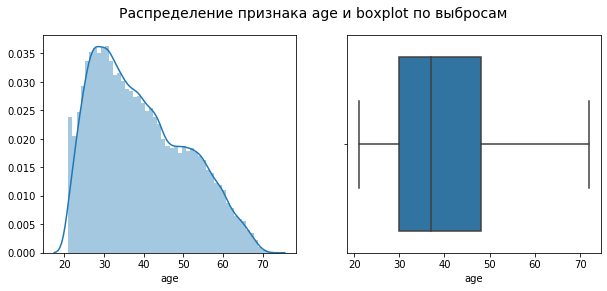

In [175]:
plt.figure(figsize=(10, 4))
plt.suptitle('Распределение признака age и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(df.age)
plt.subplot(1, 2, 2)
sns.boxplot(df.age)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

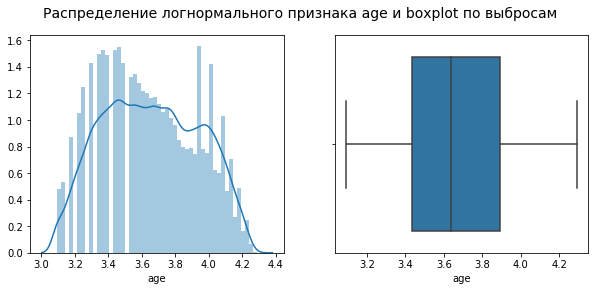

In [176]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение логнормального признака age и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(np.log(df['age'] + 1))
plt.subplot(1, 2, 2)
sns.boxplot(np.log(df['age'] + 1))
plt.show

из полученных графиков видно, что логарифмирование значений параметра дает более нормальное распределение, выбросы отсутствуют.

#### Проведем исследование признака income

<function matplotlib.pyplot.show(*args, **kw)>

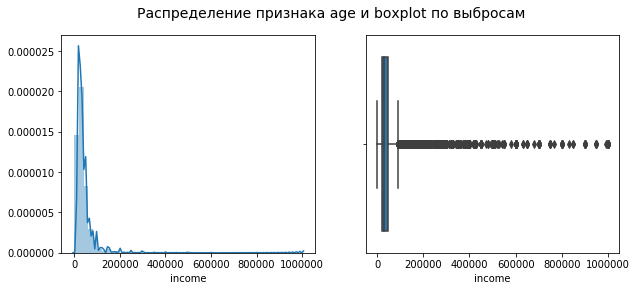

In [178]:
plt.figure(figsize=(10, 4))
plt.suptitle('Распределение признака age и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(df.income)
plt.subplot(1, 2, 2)
sns.boxplot(df.income)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

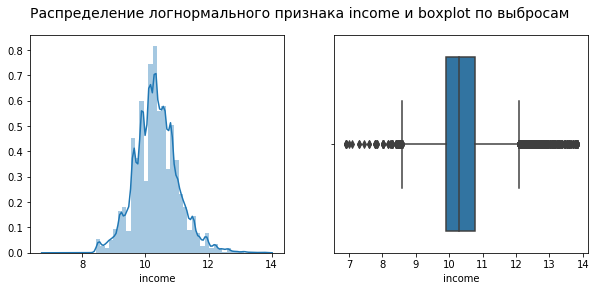

In [179]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение логнормального признака income и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(np.log(df['income'] + 1))
plt.subplot(1, 2, 2)
sns.boxplot(np.log(df['income'] + 1))
plt.show

Распределение логнормальное - взяли логарифм, выбросов очень много и слева и справа даже после логарифмирования, поэтому удалять их пока не будем. Построим модель, а потом вернемся к этому вопросу при необходимости.

#### Проведем исследование признака score_bki

<function matplotlib.pyplot.show(*args, **kw)>

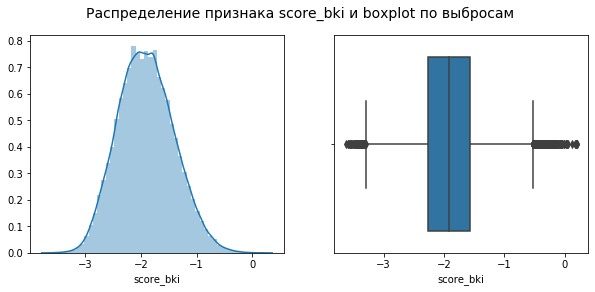

In [181]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение признака score_bki и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(df.score_bki)
plt.subplot(1, 2, 2)
sns.boxplot(df.score_bki)
plt.show

Распределение признака нормальное, но при этом большое количество выбросов. Логарифмирование параметра затруднительно ввиду отрицательных значений. Выбросов очень большое количество, поэтому сначала построим модель на таких данных,а потом при необходимости вернемся к вопросу обработки выбросов на обучающей выборке.

#### Рассмотрим параметр decline_app_cnt

<function matplotlib.pyplot.show(*args, **kw)>

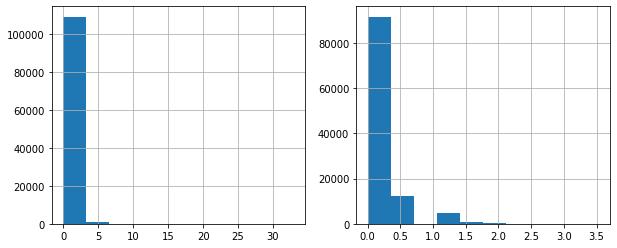

In [184]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df.decline_app_cnt.hist()
plt.subplot(1, 2, 2)
(np.log(df['decline_app_cnt'] + 1)).hist()
plt.show

In [194]:
df[df.Train == 1].decline_app_cnt.value_counts(normalize=True)

0     0.829469
1     0.113782
2     0.033442
3     0.012236
4     0.005610
5     0.002236
6     0.001531
7     0.000650
9     0.000325
8     0.000257
10    0.000149
11    0.000122
13    0.000041
12    0.000027
14    0.000027
16    0.000027
24    0.000014
15    0.000014
19    0.000014
22    0.000014
33    0.000014
Name: decline_app_cnt, dtype: float64

Распределение ближе к логнормальному. При этом выбросов очень большое количество. Обработаем их после построения модели при необходимости. Видно, что критерий 1,5 IQR отбросит очень много значений, поэтому чтобы отбросить совсем большие хвосты отбросим только значения не входящие в .9997 выборки. Ниже для понимания посмотрим на распределение признака в обучающей выборке.

#### Рассмотрим параметр bki_request_cnt

<function matplotlib.pyplot.show(*args, **kw)>

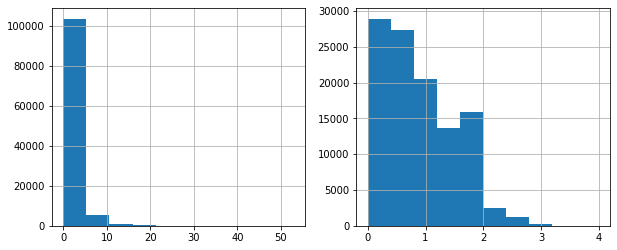

In [246]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df.bki_request_cnt.hist()
plt.subplot(1, 2, 2)
(np.log(df['bki_request_cnt'] + 1)).hist()
plt.show

#### Произведем работу с выбросами

Выбросы будем удалять только в обучающей выборке в признаках, требующие данных операций. Так как 1.5IQR отбросит нам сличком много значений, то отбросим только значения невходящие в 99,99% выборки.

In [412]:
income_q = df['income'].quantile(0.9997)
score_bki_q = df['score_bki'].quantile(0.9997)
decline_app_cnt_q = df['decline_app_cnt'].quantile(0.9997)
bki_request_cnt_q = df['bki_request_cnt'].quantile(0.9997)
print('Граница отброса значений для признака income: {}'.format(income_q))
print('Граница отброса значений для признака score_bki: {}'.format(score_bki_q))
print('Граница отброса значений для признака decline_app_cnt: {}'.format(
    decline_app_cnt_q))
print('Граница отброса значений для признака bki_request_cnt: {}'.format(
    bki_request_cnt_q))

Граница отброса значений для признака income: 900000.0
Граница отброса значений для признака score_bki: -0.14288563945099936
Граница отброса значений для признака decline_app_cnt: 10.0
Граница отброса значений для признака bki_request_cnt: 25.0


In [413]:
# Для очистки тренировочного датасета от выбросов в числовых переменных, снова разделим общий датасет по признаку Sample
train_data = df.query('Train == 1')
test_data = df.query('Train == 0')

Посчитаем количество отбрасываемых значений при текущем подходе

In [414]:
# у столбцов 'age'и 'app_date'  на боксплотах нет выбросов, поэтому рассмотрим  другие 4 столбца
# подсчитаем количество значений, лежащих за пределами границ выбросов в тренировочном датасете:

print('Количество значений за пределами границ выбросов в "bki_request_cnt":',
      len(train_data.loc[train_data['bki_request_cnt'] > 25]))
print((len(train_data.loc[train_data['bki_request_cnt']
                          > 25]) / train_data.shape[0])*100, '% общего датасета')

print('Количество значений за пределами границ выбросов в "decline_app_cnt":',
      len(train_data.loc[train_data['decline_app_cnt'] > 10]))
print((len(train_data.loc[train_data['decline_app_cnt']
                          > 10]) / train_data.shape[0])*100, '% общего датасета')

print('Количество значений за пределами границ выбросов в "income":',
      len(train_data.loc[train_data['income'] > 90_000]))
print((len(train_data.loc[train_data['income'] > 90_000]
           ) / train_data.shape[0])*100, '% общего датасета')

print('Количество значений за пределами границ выбросов в "score_bki":',
      len((train_data.loc[train_data['score_bki'] > -0.14288563945099936]) + (train_data.loc[-3.29925 > train_data['score_bki']])))
print((len((train_data.loc[train_data['score_bki'] > -0.14288563945099936]) +
           (train_data.loc[-3.29925 > train_data['score_bki']]))/train_data.shape[0])*100, '% общего датасета')

Количество значений за пределами границ выбросов в "bki_request_cnt": 18
0.024390574398027075 % общего датасета
Количество значений за пределами границ выбросов в "decline_app_cnt": 23
0.031165733953034597 % общего датасета
Количество значений за пределами границ выбросов в "income": 4695
6.361874822152061 % общего датасета
Количество значений за пределами границ выбросов в "score_bki": 71
0.0962072656811068 % общего датасета


In [415]:
train_data = train_data.drop(
    train_data[train_data['bki_request_cnt'] > 25].index)
train_data = train_data.drop(
    train_data[train_data['decline_app_cnt'] > 10].index)
train_data = train_data.drop(train_data[train_data['income'] > 90_000].index)
train_data = train_data.drop(
    train_data[train_data['score_bki'] > -0.14288563945099936].index)
train_data = train_data.drop(
    train_data[train_data['score_bki'] < -3.29925].index)

In [416]:
# для дальнейшей обработки повторно объединим тренировочный и тесовый датасеты в один
df = test_data.append(train_data, sort=False).reset_index(drop=True)

#### Проведем логнормирование признаков

Логнормирование требуется для следующих признаков: age, income, decline_app_cnt, bki_request_cnt

In [417]:
df.age = np.log(df['age'] + 1)
df.income = np.log(df['income'] + 1)
df.decline_app_cnt = np.log(df['decline_app_cnt'] + 1)
df.bki_request_cnt = np.log(df['bki_request_cnt'] + 1)

In [418]:
df.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,sna,first_time,foreign_passport,default,Train,education_is_NAN,ACD,GRD,PGR,SCH
0,74835,22MAR2014,M,3.401197,Y,Y,0.000000,0,-2.271884,1.386294,...,1,4,N,NaN,0,0,0,1,0,0
1,17527,24JAN2014,F,3.688879,N,N,1.791759,0,-1.504999,1.098612,...,4,3,N,NaN,0,0,0,0,0,1
2,75683,23MAR2014,M,3.931826,Y,Y,0.000000,0,-1.691339,0.693147,...,1,3,Y,NaN,0,0,0,0,0,0
3,26883,03FEB2014,M,4.043051,N,N,0.000000,0,-2.374182,0.693147,...,1,3,N,NaN,0,0,0,0,0,1
4,28862,04FEB2014,F,3.663562,N,N,0.000000,0,-2.487502,0.000000,...,1,3,N,NaN,0,0,0,1,0,0


### Проведем исследование зависимости значения дефолта от значений числовых признаков

In [401]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']

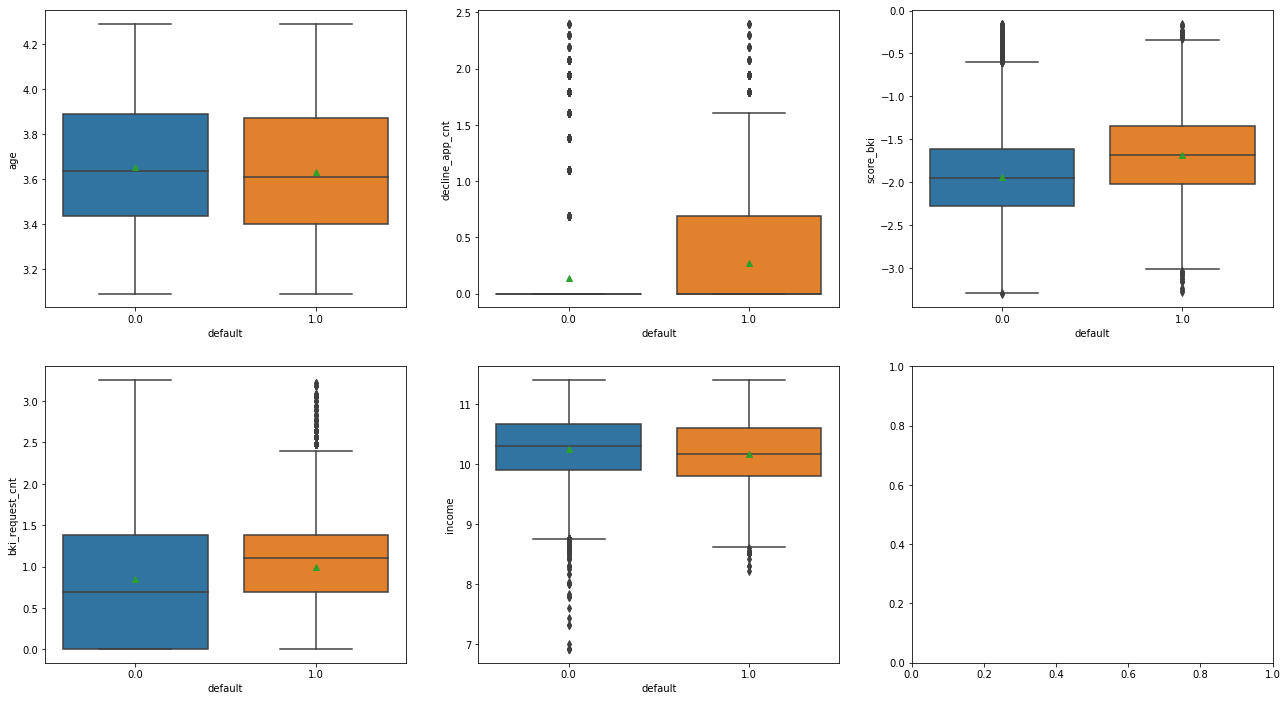

In [296]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
plt.subplots_adjust(wspace=0.2)
axes = axes.flatten()
for i in range(len(num_cols)):
    sns.boxplot(x="default", y=num_cols[i], data=df[df['Train']
                                                    == 1], orient='v', ax=axes[i],  showmeans=True)

Выводы:
- age: Дефолтные клиенты в среднем: младше,
- 'bki_request_cnt': Дефолтные клиенты в среднем имеют больше запросов в БКИ
- 'decline_app_cnt' Дефолтные клиенты в среднем имеют большее количество отмененных заявок
- 'income': Дефолтные клиенты в среднем имеют более низкий доход-
- 'score_bki': Дефолтные клиенты в среднем имеют более высокий скорринговый балл.

### Посмотрим на матрицу корреляций числовых признаков

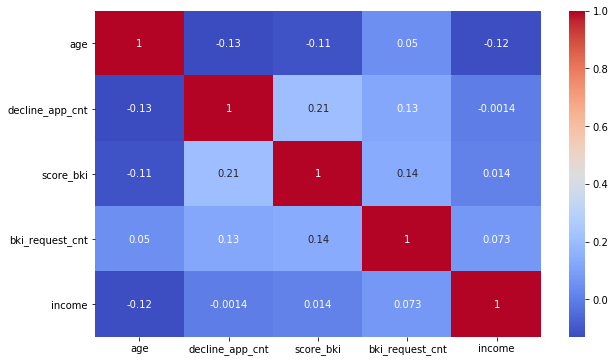

In [297]:
correlation = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Сильной корреляции между признаками нет, поэтому оставляем все для построения модели

### Оценим значимость числовых признаков

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

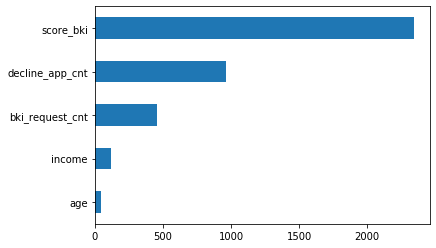

In [299]:
imp_num = pd.Series(f_classif(df_train[num_cols], df_train['default'])[
                    0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

Видим, что наиболее важным признаком явл. score_bki - скоринговый балл по данным из БКИ, а наименее важным - возраст (age)

### Рассмотрим бинарные признаки

In [422]:
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

Для того, чтобы модель смогла обработать бинарные признаки, их необходимо закодировать. Проведем кодирование через 0 и 1 с помощью LabelEncoder

In [423]:
label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])

# убедимся в преобразовании
df.head()

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,sna,first_time,foreign_passport,default,Train,education_is_NAN,ACD,GRD,PGR,SCH
0,74835,22MAR2014,1,3.401197,1,1,0.000000,0,-2.271884,1.386294,...,0,3,0,NaN,0,0,0,1,0,0
1,17527,24JAN2014,0,3.688879,0,0,1.791759,0,-1.504999,1.098612,...,3,2,0,NaN,0,0,0,0,0,1
2,75683,23MAR2014,1,3.931826,1,1,0.000000,0,-1.691339,0.693147,...,0,2,1,NaN,0,0,0,0,0,0
3,26883,03FEB2014,1,4.043051,0,0,0.000000,0,-2.374182,0.693147,...,0,2,0,NaN,0,0,0,0,0,1
4,28862,04FEB2014,0,3.663562,0,0,0.000000,0,-2.487502,0.000000,...,0,2,0,NaN,0,0,0,1,0,0


### Рассмотрим категориальные признаки

In [419]:
cat_cols = ['region_rating', 'home_address',
            'work_address', 'sna', 'first_time']

In [420]:
label_encoder = LabelEncoder()

for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])

 # убедимся в преобразовании
df.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,sna,first_time,foreign_passport,default,Train,education_is_NAN,ACD,GRD,PGR,SCH
0,74835,22MAR2014,M,3.401197,Y,Y,0.000000,0,-2.271884,1.386294,...,0,3,N,NaN,0,0,0,1,0,0
1,17527,24JAN2014,F,3.688879,N,N,1.791759,0,-1.504999,1.098612,...,3,2,N,NaN,0,0,0,0,0,1
2,75683,23MAR2014,M,3.931826,Y,Y,0.000000,0,-1.691339,0.693147,...,0,2,Y,NaN,0,0,0,0,0,0
3,26883,03FEB2014,M,4.043051,N,N,0.000000,0,-2.374182,0.693147,...,0,2,N,NaN,0,0,0,0,0,1
4,28862,04FEB2014,F,3.663562,N,N,0.000000,0,-2.487502,0.000000,...,0,2,N,NaN,0,0,0,1,0,0


Оценим значимость категориальных признаков и бинарных

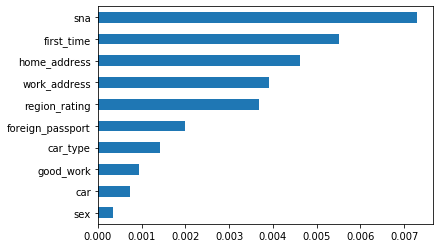

In [424]:
imp_cat = Series(mutual_info_classif(df[df['Train'] == 1][bin_cols + cat_cols], df[df['Train'] == 1].default,
                                     discrete_features=True), index=bin_cols + cat_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

Видим, что наиболее важным признаком явл. sna - связь заемщика с клиентами банка, а наименее важным -пол (sex).

Преобразуем категориальные признаки в dummy-переменные

In [426]:
df = pd.get_dummies(df, columns=cat_cols, dummy_na=False, dtype='uint8')

KeyError: "None of [Index(['region_rating', 'home_address', 'work_address', 'sna', 'first_time'], dtype='object')] are in the [columns]"

In [427]:
df.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address_1,work_address_2,sna_0,sna_1,sna_2,sna_3,first_time_0,first_time_1,first_time_2,first_time_3
0,74835,22MAR2014,1,3.401197,1,1,0.000000,0,-2.271884,1.386294,...,1,0,1,0,0,0,0,0,0,1
1,17527,24JAN2014,0,3.688879,0,0,1.791759,0,-1.504999,1.098612,...,1,0,0,0,0,1,0,0,1,0
2,75683,23MAR2014,1,3.931826,1,1,0.000000,0,-1.691339,0.693147,...,1,0,1,0,0,0,0,0,1,0
3,26883,03FEB2014,1,4.043051,0,0,0.000000,0,-2.374182,0.693147,...,1,0,1,0,0,0,0,0,1,0
4,28862,04FEB2014,0,3.663562,0,0,0.000000,0,-2.487502,0.000000,...,0,1,1,0,0,0,0,0,1,0


### Произведем подготовку и исследование признака app_date

In [428]:
df.app_date = pd.to_datetime(df.app_date, format='%d%b%Y')

In [429]:
# Выясняем начало и конец периода нашего датасета - это 1 января и 30 апреля 2014 года
start = df.app_date.min()
end = df.app_date.max()
start, end

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-04-30 00:00:00'))

In [430]:
df['days'] = (df.app_date - start).dt.days.astype('int')

### Подготовим данные для построения модели

In [431]:
df.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address_2,sna_0,sna_1,sna_2,sna_3,first_time_0,first_time_1,first_time_2,first_time_3,days
0,74835,2014-03-22,1,3.401197,1,1,0.000000,0,-2.271884,1.386294,...,0,1,0,0,0,0,0,0,1,80
1,17527,2014-01-24,0,3.688879,0,0,1.791759,0,-1.504999,1.098612,...,0,0,0,0,1,0,0,1,0,23
2,75683,2014-03-23,1,3.931826,1,1,0.000000,0,-1.691339,0.693147,...,0,1,0,0,0,0,0,1,0,81
3,26883,2014-02-03,1,4.043051,0,0,0.000000,0,-2.374182,0.693147,...,0,1,0,0,0,0,0,1,0,33
4,28862,2014-02-04,0,3.663562,0,0,0.000000,0,-2.487502,0.000000,...,1,1,0,0,0,0,0,1,0,34


Для дальнейшей работы произведем нормализацию числовых признаков с помощью RobustScaler, выбор этого метода нормализации обусловлен наличием в датасете достаточно большого количества выбросов.

In [432]:
num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'days']

In [433]:
df[num_cols] = RobustScaler().fit_transform(df[num_cols].values)

In [434]:
df.head(5)

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address_2,sna_0,sna_1,sna_2,sna_3,first_time_0,first_time_1,first_time_2,first_time_3,days
0,74835,2014-03-22,1,-0.516321,1,1,0.000000,0,-0.509401,0.500000,...,0,1,0,0,0,0,0,0,1,0.321429
1,17527,2014-01-24,0,0.112035,0,0,1.791759,0,0.603374,0.292481,...,0,0,0,0,1,0,0,1,0,-0.696429
2,75683,2014-03-23,1,0.642678,1,1,0.000000,0,0.332989,0.000000,...,0,1,0,0,0,0,0,1,0,0.339286
3,26883,2014-02-03,1,0.885618,0,0,0.000000,0,-0.657840,0.000000,...,0,1,0,0,0,0,0,1,0,-0.517857
4,28862,2014-02-04,0,0.056736,0,0,0.000000,0,-0.822271,-0.500000,...,1,1,0,0,0,0,0,1,0,-0.500000


In [435]:
df.drop(['app_date'], axis=1, inplace=True)

### Построение модели

Построим модель без гиперпараметров

In [436]:
train_data = df.query('Train == 1').drop(['Train', 'client_id'], axis=1)
test_data = df.query('Train == 0').drop(['Train', 'client_id'], axis=1)

y = train_data.default.values
X = train_data.drop(['default'], axis=1)

In [437]:
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


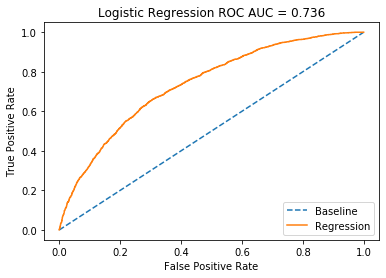

In [438]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [439]:
print('Метрика accuracy для модели равно: {}'.format(
    accuracy_score(y_test, y_pred)))
print('Метрика precision_score для модели равно: {}'.format(
    precision_score(y_test, y_pred)))
print('Метрика recall_score для модели равно: {}'.format(
    recall_score(y_test, y_pred)))
print('Метрика f1_score для модели равно: {}'.format(f1_score(y_test, y_pred)))

Метрика accuracy для модели равно: 0.8690674588797913
Метрика precision_score для модели равно: 0.4845360824742268
Метрика recall_score для модели равно: 0.026053215077605323
Метрика f1_score для модели равно: 0.04944765912677539


In [440]:
cf_matrix = confusion_matrix(y_test, y_pred)

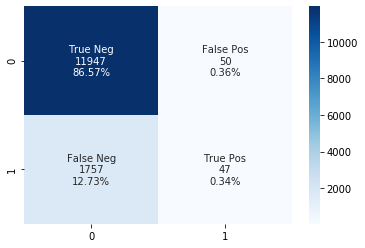

In [441]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Наша модель показала относительно не плохой результат по обнаружению заемщиков, которые вернут деньги банку, при этом мы бы пропустили 13% заемщиков, у которых случится дефолт и они не смогут выплатить кредит. Этот показатель попробуем улучшить с помощью подбора гиперпараметров и других способов. 
Такие показатели могут быть связаны с несбалансированностью классов, это можно поправить с помощью гиперпараметров.

#### Построение модели с гиперпараметрами

Для начала найдем гиперпараметры (взяли не все возможные параметры для перебора для быстроты вычисления)

In [358]:
C = np.logspace(0, 4, 10)
iter_ = 50
epsilon_stop = 1e-3

hyperparameters = [
    {'penalty': ['l1'],
     'C': C,
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'],
     'C': C,
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'],
     'C': C,
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
print('Лучшее max_iter:', best_model.best_estimator_.get_params()['max_iter'])
print('Лучшее tol:', best_model.best_estimator_.get_params()['tol'])

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: Conve

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

Лучшее Penalty: l2
Лучшее C: 2.7825594022071245
Лучшее max_iter: 50
Лучшее tol: 0.001


/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


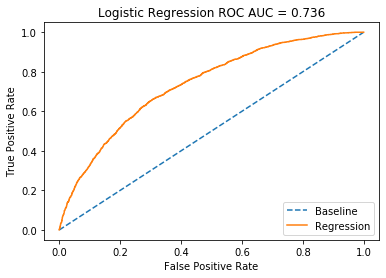

In [442]:
model2 = LogisticRegression(penalty='l2', C=2.7825594022071245, max_iter=50,
                            class_weight='balanced', tol=0.001, random_state=42, solver='sag')
model2.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model2.predict(X_test)


fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

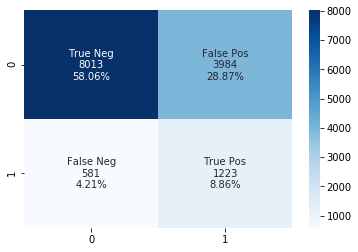

In [443]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Наша модель стала работать по иному в определении надежности клиента. Теперь мы пропускаем неблагополучных заемщиков намного меньше. Однако мы начали сильно больше людей определять дефолтными, а они ими не являются. Это означает, что банк может недополучить прибыли и, например, ухудшить свою репутацию большим количеством отказов в выдаче кредитов.

### Submission

In [444]:
X_test = test_data.drop(['default'], axis=1)

In [445]:
y_pred_prob = model2.predict_proba(X_test)[:, 1]


submit = pd.DataFrame(df_test.client_id)
submit['default'] = y_pred_prob
submit.to_csv('submission.csv', index=False)